In [1]:
# YOLO (You Only Look Once) to algorytm detekcji obiektów w obrazie używany do detekcji w czasie rzeczywistym.
# Stosuje on podejście jednostopniowe. Najpierw zdjęcie jest dzielone na równe komórki, następnie model przetwarza każdą
# komórkę aby określić etykietę obiektu i prawdopodobieństwo obecności przedmiotu w komórce.
# Podczas gdy wcześniejsze wersje skupiały się na wydajności, YOLOv7 został stworzony z myślą o prędkości przetwarzania.

import sys
import torch
print(f"Python version: {sys.version}, {sys.version_info} ")
print(f"Pytorch version: {torch.__version__} ")


Python version: 3.12.0 (tags/v3.12.0:0fb18b0, Oct  2 2023, 13:03:39) [MSC v.1935 64 bit (AMD64)], sys.version_info(major=3, minor=12, micro=0, releaselevel='final', serial=0) 
Pytorch version: 2.2.2+cpu 


In [2]:

!nvidia-smi

Tue Apr 16 16:08:43 2024       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 526.98       Driver Version: 526.98       CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0  On |                  N/A |
|  0%   34C    P8    16W / 200W |    961MiB /  8192MiB |     19%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
# Download YOLOv7 code
!git clone https://github.com/WongKinYiu/yolov7
%cd yolov7

c:\Users\Piotr\Desktop\School\IntelOb\lab7\yolov7


fatal: destination path 'yolov7' already exists and is not an empty directory.
c:\Users\Piotr\Desktop\School\IntelOb\.venv\Lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [4]:
!# Download trained weights
!#curl -O -L https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7.pt

'#' is not recognized as an internal or external command,
operable program or batch file.


'#curl' is not recognized as an internal or external command,
operable program or batch file.


In [5]:
!# Detection
!python detect.py --weights yolov7.pt --conf 0.25 --img-size 640 --source inference//images//horses.jpg

'#' is not recognized as an internal or external command,
operable program or batch file.


Namespace(weights=['yolov7.pt'], source='inference//images//horses.jpg', img_size=640, conf_thres=0.25, iou_thres=0.45, device='', view_img=False, save_txt=False, save_conf=False, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project='runs/detect', name='exp', exist_ok=False, no_trace=False)
Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 

5 horses, Done. (323.1ms) Inference, (1.0ms) NMS
 The image with the result is saved in: runs\detect\exp10\horses.jpg
Done. (0.341s)


YOLOR  v0.1-128-ga207844 torch 2.2.2+cpu CPU

Model Summary: 306 layers, 36905341 parameters, 6652669 gradients
c:\Users\Piotr\Desktop\School\IntelOb\.venv\Lib\site-packages\torch\functional.py:507: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ..\aten\src\ATen\native\TensorShape.cpp:3550.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [6]:
# define helper functions to show images
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

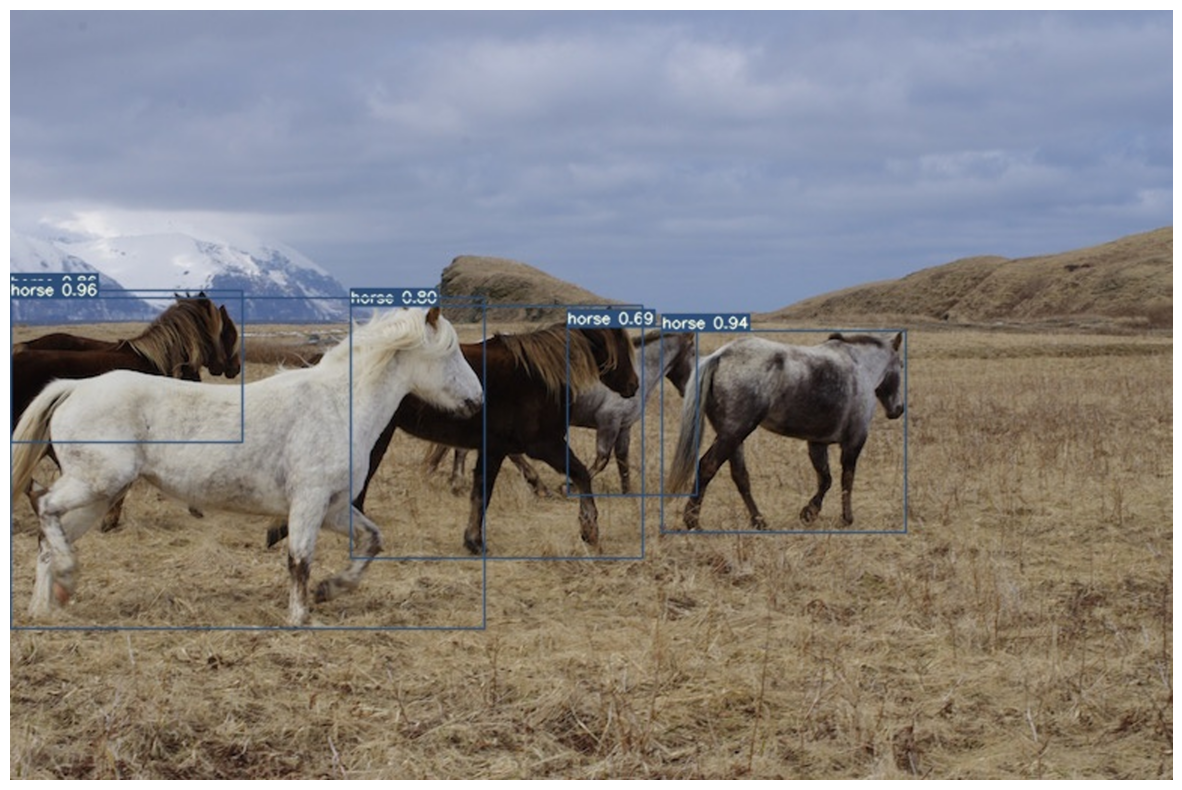

In [8]:
imShow("runs/detect/exp10/horses.jpg")